## Heatmap using seaborn for UMR (draft)

In [1]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 150

setting the theme, importing the data and ordering them in a sepcific way.

In [2]:
sns.set_theme(style="white")

In [3]:
file = "matrix-b73-ref.csv"
b73Ref = pd.read_csv(file, index_col=0).reindex(["B73", "B97", "Ky21", "M162W", 
                                                 "Ms71", "Oh43", "Oh7B", "M37W", "Mo18W", "Tx303", "HP301", "P39",
                                                 "Il14H", "CML52", "CML69", "CML103", "CML228", "CML247", "CML277",
                                                 "CML322", "CML333", "Ki3", "Ki11", "NC350", "NC358", "Tzi8"])
b73Ref = b73Ref[["B73", "B97", "Ky21", "M162W", 
                 "Ms71", "Oh43", "Oh7B", "M37W", "Mo18W", "Tx303", "HP301", "P39", 
                 "Il14H", "CML52", "CML69", "CML103", "CML228", "CML247", "CML277", 
                 "CML322", "CML333", "Ki3", "Ki11", "NC350", "NC358", "Tzi8"]]
# check to see if everyting is okay
b73Ref.head(5)


B73    B97   Ky21  M162W   Ms71   Oh43   Oh7B   M37W  Mo18W  Tx303  \
matrix                                                                         
B73         0  29406  27384  26694  27910  30430  29113  25199  24812  24418   
B97     29406      0  28614  27600  30637  30816  31278  26604  26642  25622   
Ky21    27384  28614      0  27738  27614  27741  28333  26473  26362  25196   
M162W   26694  27600  27738      0  27053  28911  28259  26624  28013  26256   
Ms71    27910  30637  27614  27053      0  28937  29835  25565  25790  25230   

        ...  CML228  CML247  CML277  CML322  CML333    Ki3   Ki11  NC350  \
matrix  ...                                                                
B73     ...   23525   24899   23332   23567   23839  23285  23807  23285   
B97     ...   25375   27091   25185   25475   25689  24820  25495  25789   
Ky21    ...   25110   26106   24944   25149   24818  24781  25069  25143   
M162W   ...   26497   28142   25999   26730   26197  26110  26446  26137   
Ms71    ...   24207   25620   24244   25860   25630  23978  24910  24431   

        NC358   Tzi8  
matrix                
B73     24788  19732  
B97     25524  21863  
Ky21    25292  22140  
M162W   26976  23368  
Ms71    24826  21732  

[5 rows x 26 columns]

### Plotting the heatmap for the UMR data
This data was using the B73 as reference (individual NAMs were mapped to B73 and then UMRs were determined)

Text(0.5, 1.0, 'Using B73 as reference')

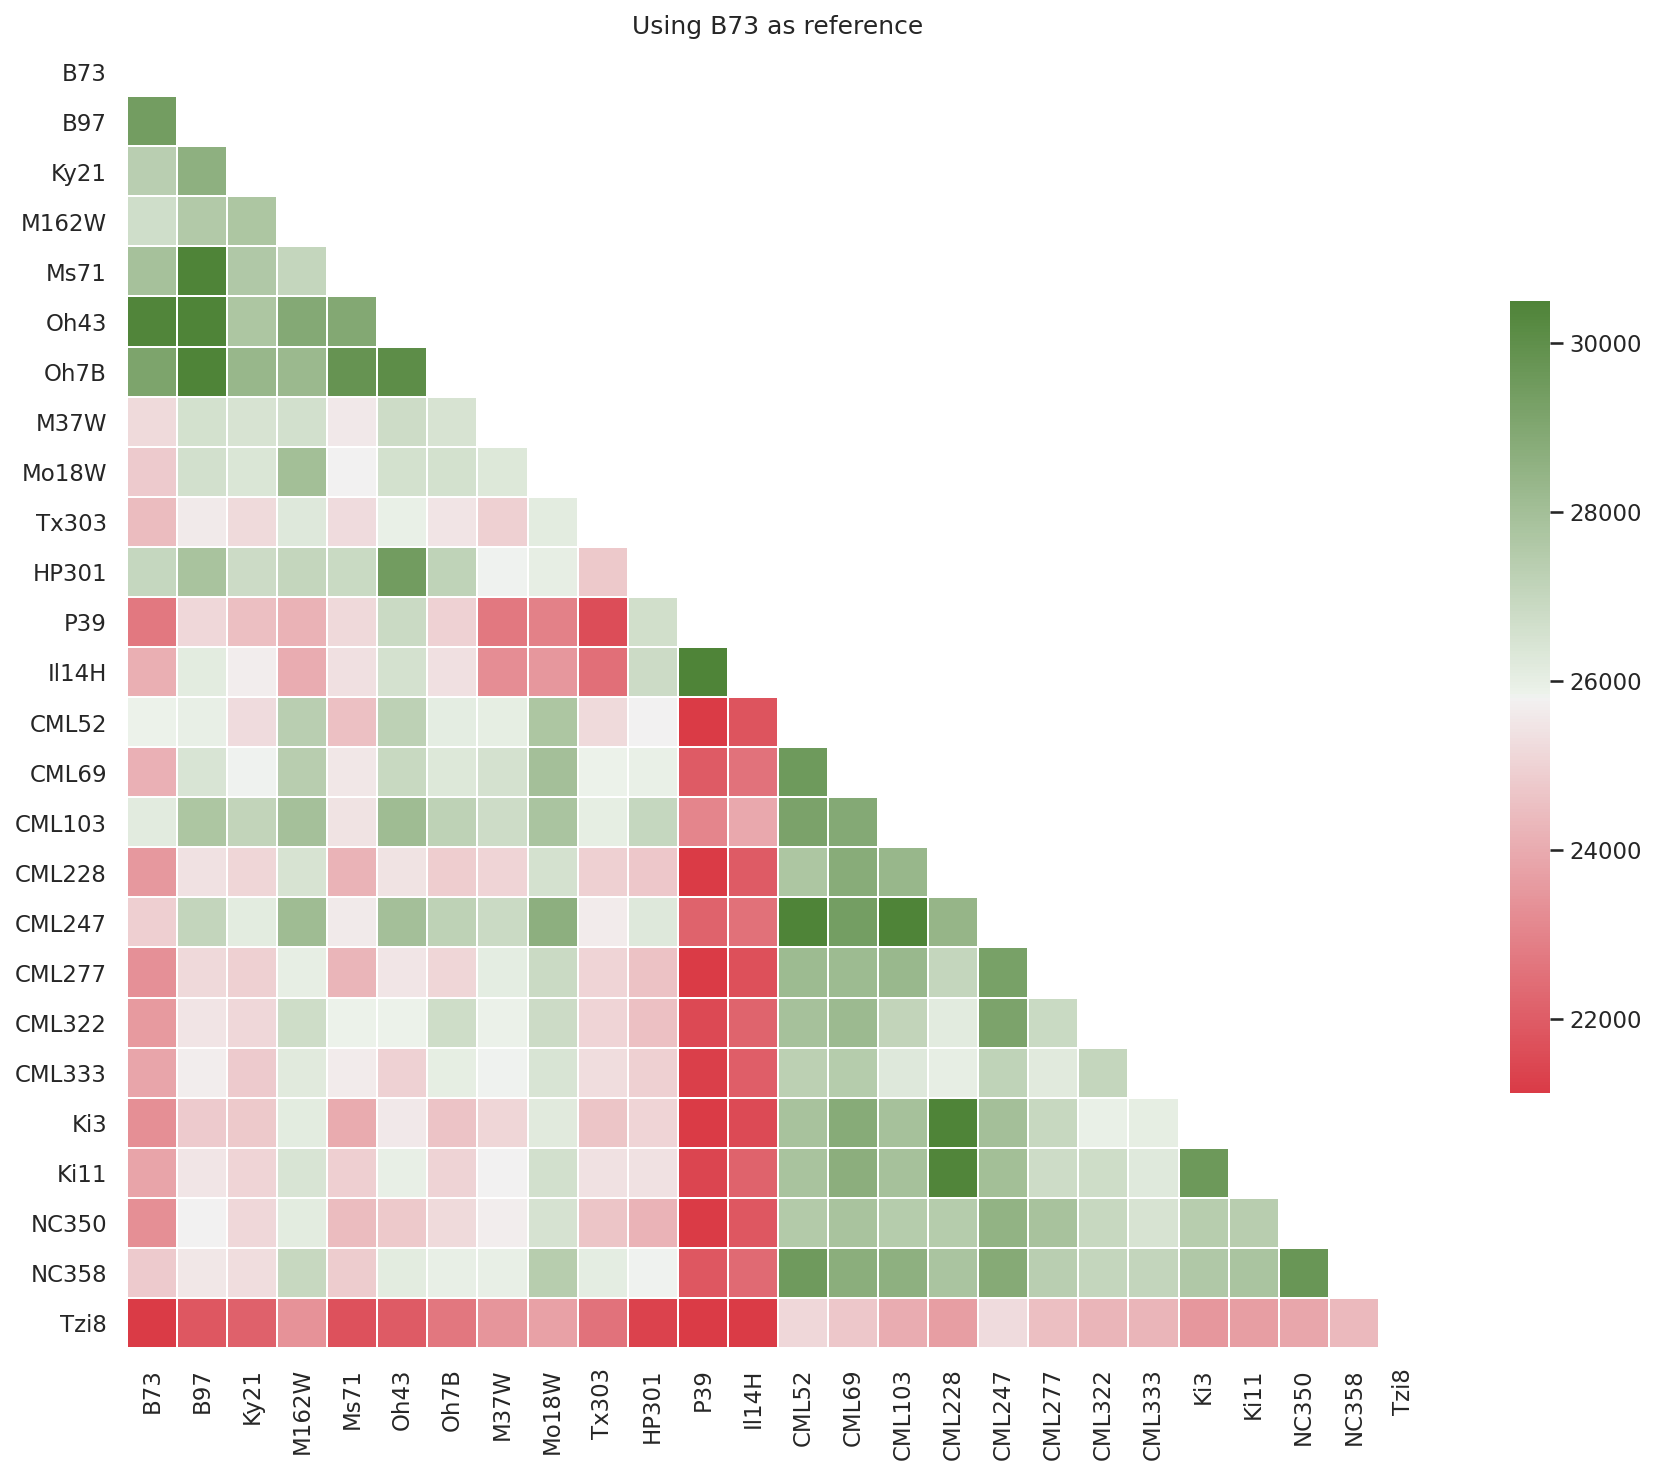

In [4]:
mask = np.triu(np.ones_like(b73Ref, dtype=bool))
f, ax = plt.subplots(figsize=(14, 14))
cmap = sns.diverging_palette(370, 120, n=80, as_cmap=True)
sns.heatmap(b73Ref, mask=mask, cmap=cmap, robust=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.ylabel('')
plt.title('Using B73 as reference')

In [5]:
file = "matrix-b73-lifted-full.csv"
b73LiftedFull = pd.read_csv(file, index_col=0).reindex(["B73", "B97", "Ky21", "M162W", 
                                                 "Ms71", "Oh43", "Oh7B", "M37W", "Mo18W", "Tx303", "HP301", "P39",
                                                 "Il14H", "CML52", "CML69", "CML103", "CML228", "CML247", "CML277",
                                                 "CML322", "CML333", "Ki3", "Ki11", "NC350", "NC358", "Tzi8"])
b73LiftedFull = b73LiftedFull[["B73", "B97", "Ky21", "M162W", 
                 "Ms71", "Oh43", "Oh7B", "M37W", "Mo18W", "Tx303", "HP301", "P39", 
                 "Il14H", "CML52", "CML69", "CML103", "CML228", "CML247", "CML277", 
                 "CML322", "CML333", "Ki3", "Ki11", "NC350", "NC358", "Tzi8"]]
#b73LiftedFull.head(5)

### Plotting the heatmap for the UMR data (part 2)
This data was using the respective NAM as reference, but the coords were lifted over to B73 using the progressive Cactus generated chain files. The split hits (i.e., when a particular start-stop coord was lifted over to B73, they were represented on B73 as multiple chunks due to divergence or missing alignments) were collapsed and included in this data.

Text(0.5, 1.0, 'NAM coordinates, lifted over to B73 (includes split hits)')

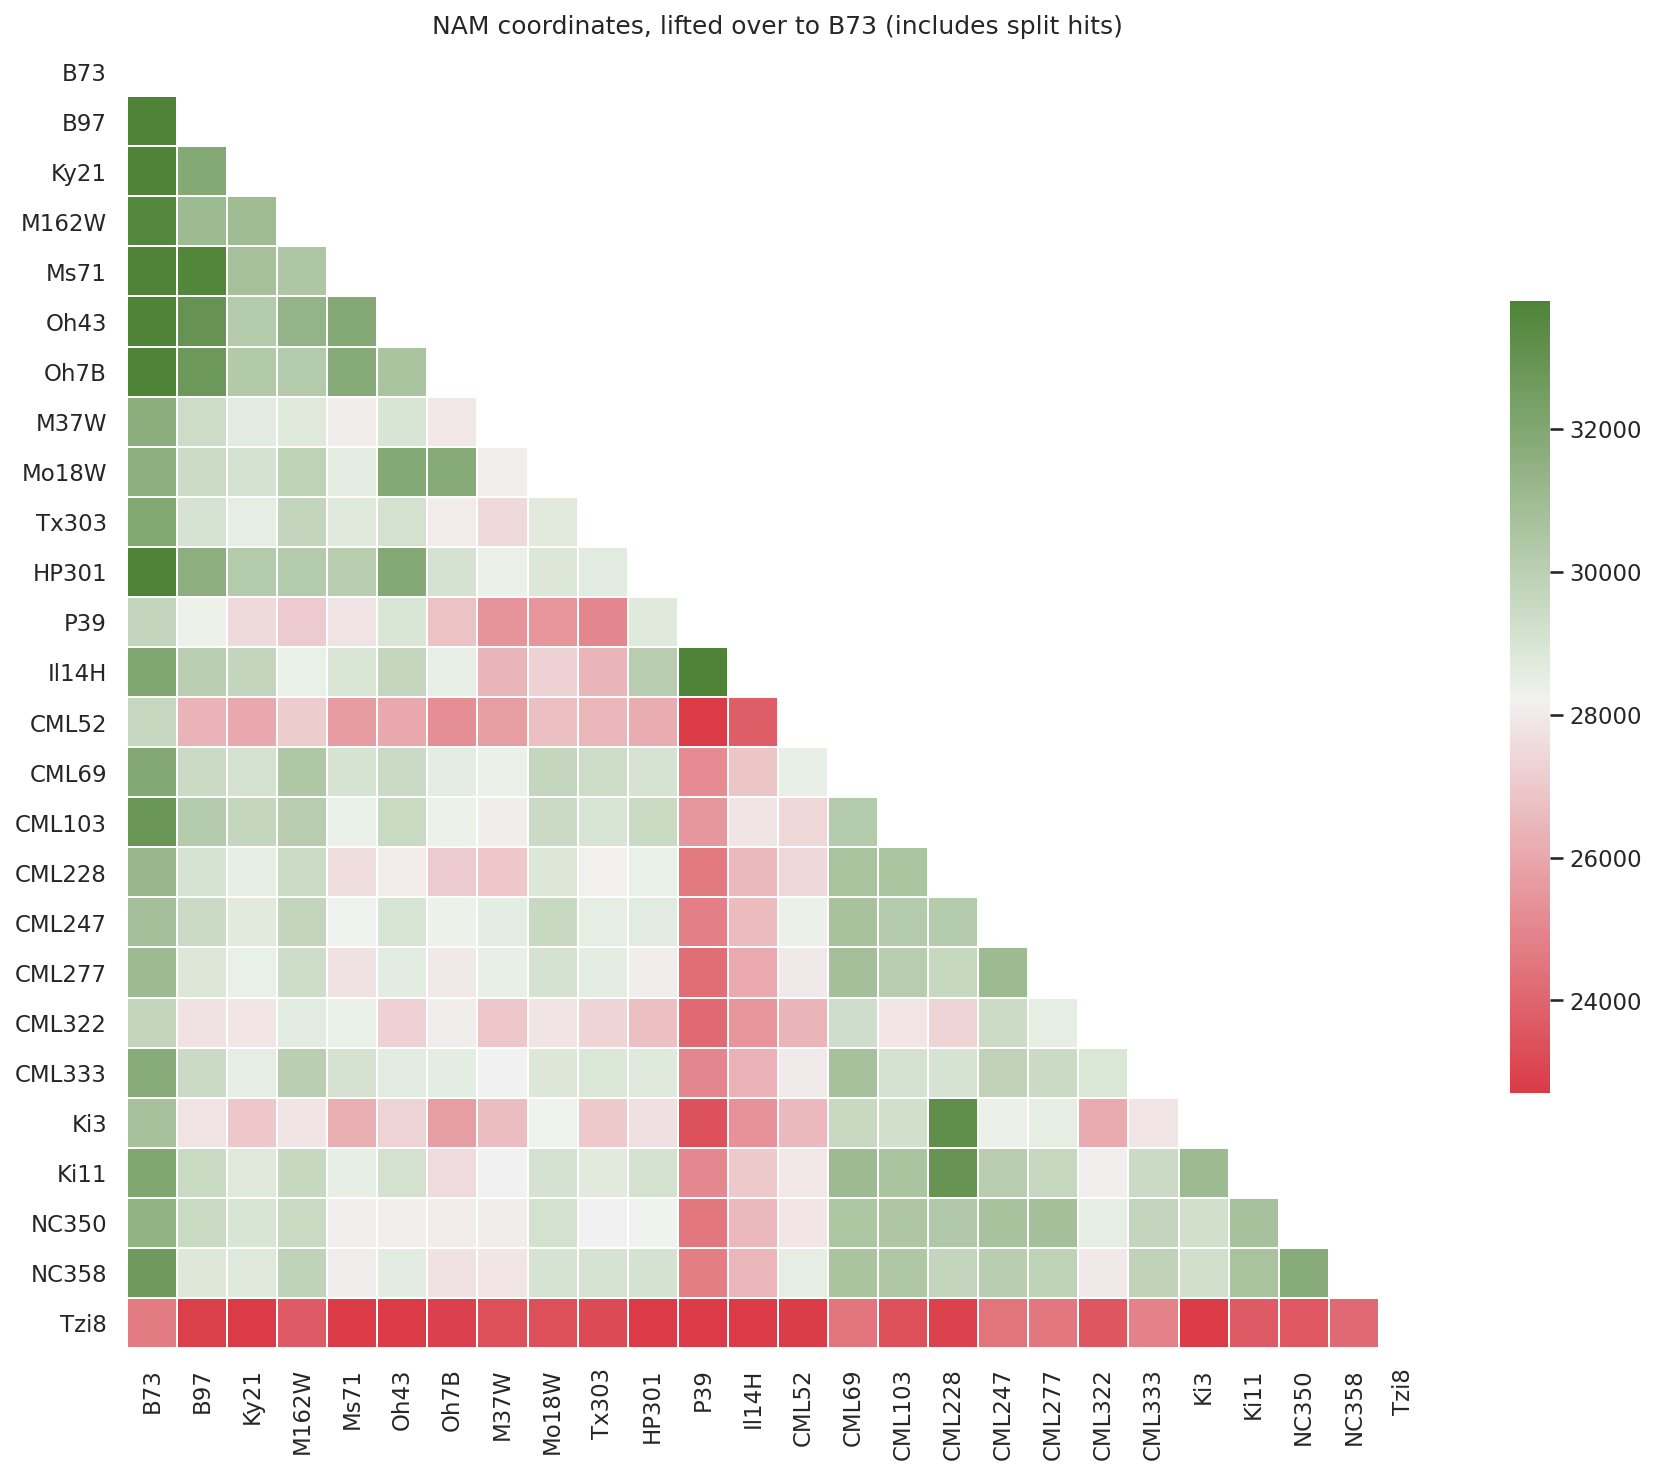

In [6]:
mask = np.triu(np.ones_like(b73LiftedFull, dtype=bool))
f, ax = plt.subplots(figsize=(14, 14))
cmap = sns.diverging_palette(370, 120, n=80, as_cmap=True)
sns.heatmap(b73LiftedFull, mask=mask, cmap=cmap, robust=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.ylabel('')
plt.title('NAM coordinates, lifted over to B73 (includes split hits)')

In [7]:
file = "matrix-b73-lifted-nosplithits.csv"
b73LiftedNoSplitHits = pd.read_csv(file, index_col=0).reindex(["B73", "B97", "Ky21", "M162W", 
                                                 "Ms71", "Oh43", "Oh7B", "M37W", "Mo18W", "Tx303", "HP301", "P39",
                                                 "Il14H", "CML52", "CML69", "CML103", "CML228", "CML247", "CML277",
                                                 "CML322", "CML333", "Ki3", "Ki11", "NC350", "NC358", "Tzi8"])
b73LiftedNoSplitHits = b73LiftedNoSplitHits[["B73", "B97", "Ky21", "M162W", 
                 "Ms71", "Oh43", "Oh7B", "M37W", "Mo18W", "Tx303", "HP301", "P39", 
                 "Il14H", "CML52", "CML69", "CML103", "CML228", "CML247", "CML277", 
                 "CML322", "CML333", "Ki3", "Ki11", "NC350", "NC358", "Tzi8"]]
#b73LiftedNoSplitHits.head(5)

### Plotting the heatmap for the UMR data (part 3)
This data was using the respective NAM as reference, but the coords were lifted over to B73 using the progressive Cactus generated chain files. The split hits (i.e., when a particular start-stop coord was lifted over to B73, they were represented on B73 as multiple chunks due to divergence or missing alignments) were excluded in this data.

Text(0.5, 1.0, 'NAM coordinates, lifted over to B73 (only complete hits)')

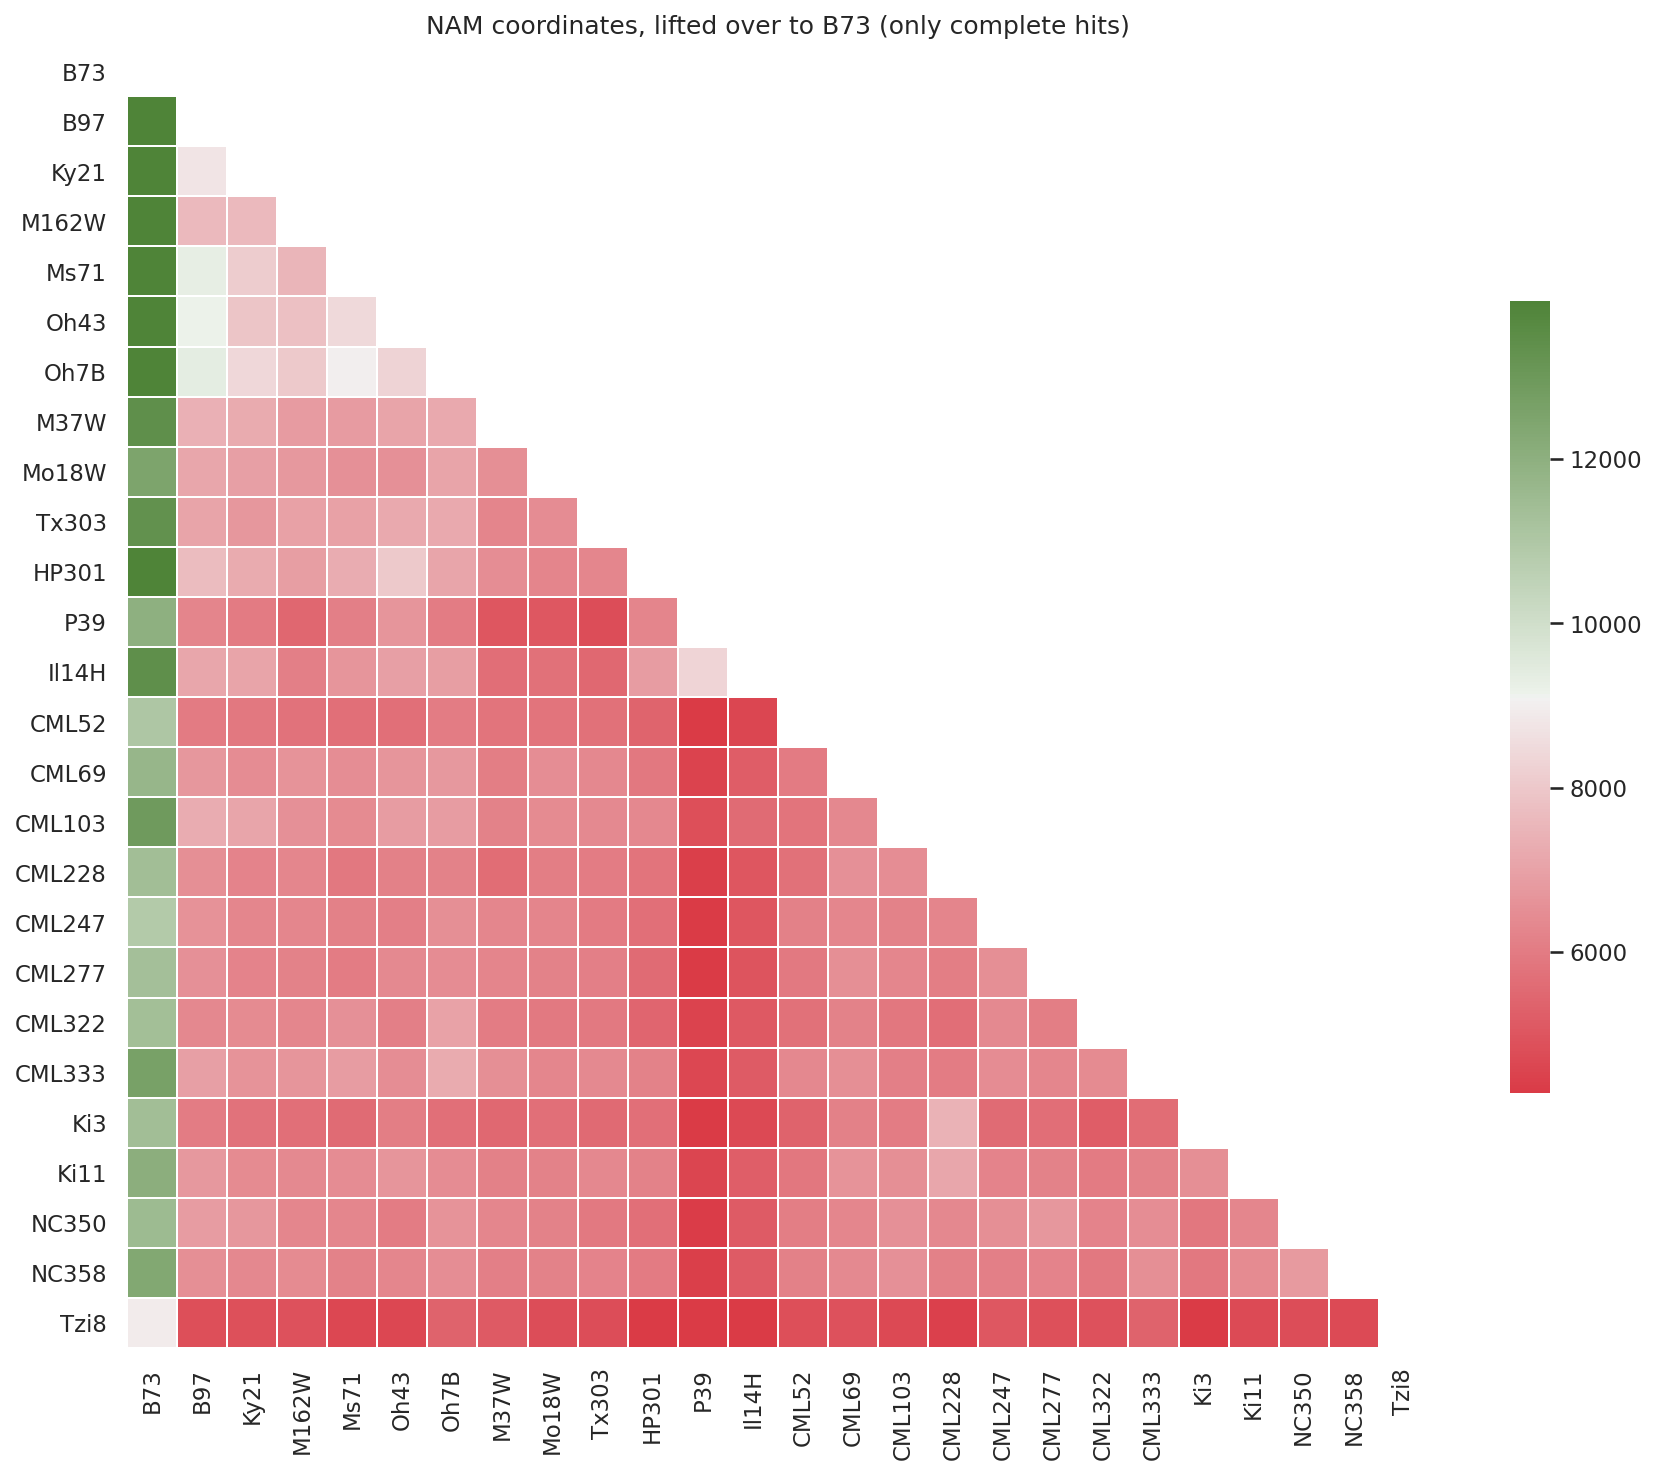

In [8]:
mask = np.triu(np.ones_like(b73LiftedNoSplitHits, dtype=bool))
f, ax = plt.subplots(figsize=(14, 14))
cmap = sns.diverging_palette(370, 120, n=80, as_cmap=True)
sns.heatmap(b73LiftedNoSplitHits, mask=mask, cmap=cmap, robust=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.ylabel('')
plt.title('NAM coordinates, lifted over to B73 (only complete hits)')